# CS 109A/STAT 121A/AC 209A/CSCI E-109A: Homework 4
# Regularization, High Dimensionality, PCA


**Harvard University**<br/>
**Fall 2017**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Rahul Dave, Margo Levine

---

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- Do not include your name(s) in the notebook even if you are submitting as a group. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

---

Your partner's name (if you submit separately):

Enrollment Status (109A, 121A, 209A, or E109A): 109A

Import libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.api import OLS
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
%matplotlib inline

C:\Users\charl\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Continuing Bike Sharing Usage Data

In this homework, we will focus on multiple linear regression, regularization, dealing with high dimensionality, and PCA. We will continue to build regression models for the Capital Bikeshare program in Washington D.C.  See Homework 3 for more information about the data.

*Note: please make sure you use all the processed data from HW 3 Part (a)...you make want to save the data set on your computer and reread the csv/json file here.


In [2]:
#read in processed dataframes from HW 3
df_test = pd.read_csv("data/processed_test")
df_train = pd.read_csv("data/processed_train")
#dropping columns that just mirror the index
df_test = df_test.drop('Unnamed: 0', axis=1)
df_test = df_test.drop('Unnamed: 0.1', axis=1)
df_train = df_train.drop('Unnamed: 0', axis=1)
df_train = df_train.drop('Unnamed: 0.1', axis=1)
x_train = df_train[['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed', 'spring', 'summer', 'fall', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Clear', 'Cloudy']].values
y_train = df_train["count"].values
x_test = df_test[['holiday', 'workingday', 'temp', 'atemp', 'humidity', 'windspeed', 'spring', 'summer', 'fall', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Clear', 'Cloudy']].values
y_test = df_test["count"].values


## Part (f): Regularization/Penalization Methods

As an alternative to selecting a subset of predictors and fitting a regression model on the subset, one can fit a linear regression model on all predictors, but shrink or regularize the coefficient estimates to make sure that the model does not "overfit" the training set. 

Use the following regularization techniques to fit linear models to the training set:
- Ridge regression
- Lasso regression
    
You may choose the shrinkage parameter $\lambda$ from the set $\{10^{-5}, 10^{-4},...,10^{4},10^{5}\}$ using cross-validation. In each case, 

- How do the estimated coefficients compare to or differ from the coefficients estimated by a plain linear regression (without shrikage penalty) in Part (b) fropm HW 3? Is there a difference between coefficients estimated by the two shrinkage methods? If so, give an explantion for the difference.
- List the predictors that are assigned a coefficient value close to 0 (say < 1e-10) by the two methods. How closely do these predictors match the redundant predictors (if any) identified in Part (c) from HW 3?
        * Predictors that go to 0 (only happened with Lasso) workingday, summer, Feb, Mar, May, Wed, Thurs 
- Is there a difference in the way Ridge and Lasso regression assign coefficients to the predictors `temp` and `atemp`? If so, explain the reason for the difference.

We next analyze the performance of the two shrinkage methods for different training sample sizes:
- Generate random samples of sizes 100, 150, ..., 400 from the training set. You may use the following code to draw a random sample of a specified size from the training set:

In [3]:
ridge_reg_no_l = Ridge(alpha = 0, fit_intercept=True)
lasso_reg_no_l = Lasso(alpha = 0, fit_intercept=True)
#in lab x_train was reshaped, do we need to reshape here??
ridge_reg_no_l.fit(x_train, y_train)
print(ridge_reg_no_l.coef_[0:])
lasso_reg_no_l.fit(x_train, y_train)
lasso_reg_no_l.coef_[0:]
#this ends up being pretty weird with the first two ('holiday' and 'workingday' being so different)

[-1457.79553768  -865.28612132   924.33440257   311.9617601   -547.66378313
  -254.73691592 -1226.18654265  -327.35750316  -193.30496781   118.83581872
   207.77591139   358.01671712   452.18490513    53.02331873  -673.42707979
 -1161.15118754  -657.63967119   523.98038482   605.08672238   231.51746394
  -465.14500996   584.54277671   513.00832048   878.80559997   769.55028298
   819.3611525   1581.97828361  1565.41169959]


C:\Users\charl\Anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.0980647314495825e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
C:\Users\charl\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
C:\Users\charl\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
C:\Users\charl\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


array([ -543.04055646,    49.46885989,   924.33440257,   311.9617601 ,
        -547.66378313,  -254.73691592, -1226.18654265,  -327.35750316,
        -193.30496781,   118.83581872,   207.77591139,   358.01671712,
         452.18490513,    53.02331873,  -673.42707979, -1161.15118754,
        -657.63967119,   523.98038482,   605.08672238,   231.51746394,
        -465.14500996,  -330.21220451,  -401.74666073,   -35.94938124,
        -145.20469824,   -95.39382872,  1581.97828361,  1565.41169959])

In [4]:
#list of lambdas
lol = [1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 1e2, 1e3, 1e4, 1e5]
#using RidgeCV correctly??
ridge = RidgeCV(alphas=lol, scoring='r2')
ridge.fit(x_train, y_train)
print(ridge.coef_, ridge.alpha_, ridge.intercept_)
#using LassoCV correctly??
lasso = LassoCV(alphas=lol)
lasso.fit(x_train, y_train)
print(lasso.coef_, lasso.alpha_, lasso.intercept_)

[ -519.28584002    -9.69225759   810.70064354   389.30069565  -565.91312167
  -258.25034901 -1050.76330479  -241.50030985  -233.61813558   -31.70360287
    83.65697339   262.49610478   418.13966728    83.29113489  -571.2207207
  -947.93957172  -445.44207583   655.06696993   677.27619608   256.84129927
  -423.17323215  -249.06465688  -291.47942189    42.20741713   -42.33297583
    11.69153985  1243.10836911  1241.98400144] 1.0 3871.28134903
[-165.93531814    0.          608.3663949   467.71870585 -555.95799159
 -247.72978164 -951.38486185   -0.         -222.09653643 -113.27489892
   -0.            0.          100.31373416   -0.         -401.24292591
 -622.66601462  -72.11374545  745.92648215  668.72728448  102.27751597
 -295.81848999 -208.95121185 -140.62644173    0.            0.
   19.32751365  753.31906604  728.86448482] 10.0 4197.49904845


C:\Users\charl\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [5]:
#--------  sample
# A function to select a random sample of size k from the training set
# Input: 
#      x (n x d array of predictors in training data)
#      y (n x 1 array of response variable vals in training data)
#      k (size of sample) 
# Return: 
#      chosen sample of predictors and responses

def sample(x, y, k):
    n = x.shape[0] # No. of training points
    
    # Choose random indices of size 'k'
    subset_ind = np.random.choice(np.arange(n), k)
    
    # Get predictors and reponses with the indices
    x_subset = x[subset_ind, :]
    y_subset = y[subset_ind]
    
    return (x_subset, y_subset)

- Fit linear, Ridge and Lasso regression models to each of the generated sample. In each case, compute the $R^2$ score for the model on the training sample on which it was fitted, and on the test set.
- Repeat the above experiment for 10 random trials/splits, and compute the average train and test $R^2$ across the trials for each training sample size. Also, compute the standard deviation (SD) in each case.
- Make a plot of the mean training $R^2$ scores for the linear, Ridge and Lasso regression methods as a function of the training sample size. Also, show a confidence interval for the mean scores extending from **mean - SD** to **mean + SD**. Make a similar plot for the test $R^2$ scores.

How do the training and test $R^2$ scores compare for the three methods? Give an explanation for your observations. How do the confidence intervals for the estimated $R^2$ change with training sample size? Based on the plots, which of the three methods would you recommend when one needs to fit a regression model using a small training sample?

*Hint:* You may use `sklearn`'s `RidgeCV` and `LassoCV` classes to implement Ridge and Lasso regression. These classes automatically perform cross-validation to tune the parameter $\lambda$ from a given range of values. You may use the `plt.errorbar` function to plot confidence bars for the average $R^2$ scores.

In [6]:
s_sizes = [100, 150, 200, 250, 300, 350, 400]
#idea here is to have arrays of r2 values from each model
lasso_tr_scores = {100: [], 150: [], 200: [], 250: [], 300: [], 350: [], 400 : []}
ridge_tr_scores = {100: [], 150: [], 200: [], 250: [], 300: [], 350: [], 400 : []}
linear_tr_scores = {100: [], 150: [], 200: [], 250: [], 300: [], 350: [], 400 : []}
lasso_tst_scores = {100: [], 150: [], 200: [], 250: [], 300: [], 350: [], 400 : []}
ridge_tst_scores = {100: [], 150: [], 200: [], 250: [], 300: [], 350: [], 400 : []}
linear_tst_scores = {100: [], 150: [], 200: [], 250: [], 300: [], 350: [], 400 : []}
for i in range(10):
    subsets = dict()
    for s in s_sizes:
        x_subset, y_subset = sample(x_train, y_train, s)
        subsets[s] = [x_subset, y_subset]
    for k, v in subsets.items():
        x_tr = v[0]
        y_tr = v[1]
        linear = LinearRegression(fit_intercept=True)
        lasso = LassoCV(alphas=lol)
        ridge = RidgeCV(alphas=lol, scoring='r2')
        lasso.fit(x_tr, y_tr)
        ridge.fit(x_tr, y_tr)
        linear.fit(x_tr, y_tr)
        lasso_tr_scores[k].append((lasso.score(x_tr, y_tr)))
        ridge_tr_scores[k].append(ridge.score(x_tr, y_tr))
        linear_tr_scores[k].append(linear.score(x_tr, y_tr))
        lasso_tst_scores[k].append(lasso.score(x_test, y_test))
        ridge_tst_scores[k].append(ridge.score(x_test, y_test))
        linear_tst_scores[k].append(linear.score(x_test, y_test))


C:\Users\charl\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\charl\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\charl\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\charl\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\charl\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\charl\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\charl\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\charl\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increa

C:\Users\charl\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\charl\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\charl\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\charl\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increa

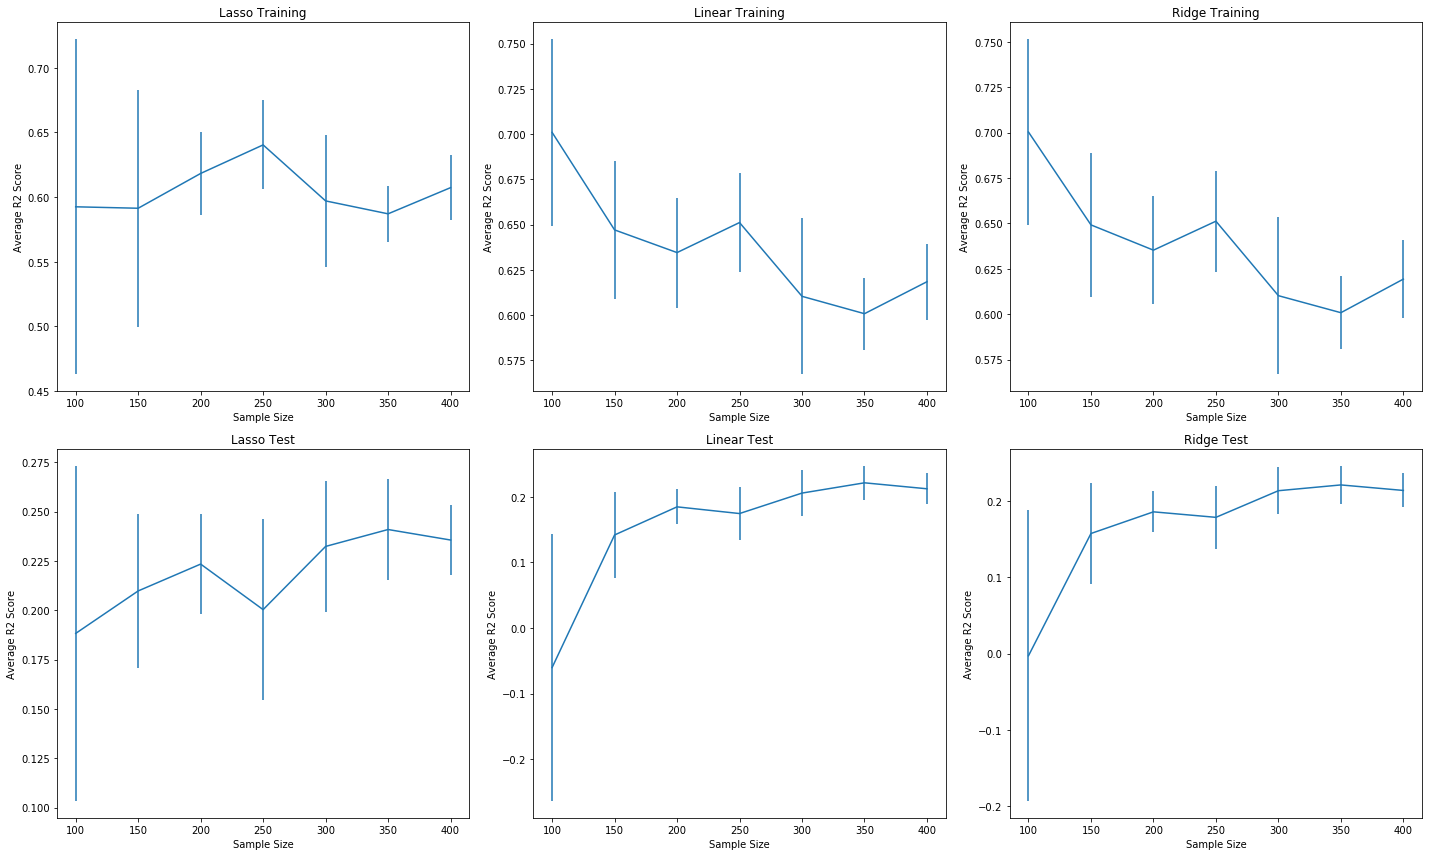

In [7]:
scores = {'Lasso Training': lasso_tr_scores, 'Linear Training': linear_tr_scores, 'Ridge Training': ridge_tr_scores, 'Lasso Test': lasso_tst_scores,'Linear Test': linear_tst_scores,'Ridge Test': ridge_tst_scores}
fig = plt.figure(figsize=(20, 12))
for i, (t, d) in enumerate(scores.items()):
    plt.subplot(2,3,i+1)
    plt.title(t)
    plt.xlabel("Sample Size")
    plt.ylabel("Average R2 Score")
    new_d = {k: [np.mean(v), np.std(v)] for k, v in d.items()}
    lists = sorted(new_d.items())
    x, y = zip(*lists)
    y, z = zip(*y)
    plt.errorbar(x, y, yerr=z)
    
fig.tight_layout()
plt.show()

your answers here:

Q: How do the estimated coefficients compare to or differ from the coefficients estimated by a plain linear regression (without shrikage penalty) in Part (b) fropm HW 3? Is there a difference between coefficients estimated by the two shrinkage methods?

A: Without a shrinkage penalty, the coefficients are exactly the same as those estimated by a plain linear regression except for two. The coefficients for holiday and workingday differ between all three regressions and we were not able to figure out the reason for this differentiation. We went to several office hours and made a Piazza post, but we weren't able to find an answer. Other than those two coefficients there is no difference between the coefficients estimated by the two different shrinkage methods.

<hr />
Q: List the predictors that are assigned a coefficient value close to 0 (say < 1e-10) by the two methods. How closely do these predictors match the redundant predictors (if any) identified in Part (c) from HW 3?

A: Predictors with coefficients close to 0: workingday, summer, Feb, Mar, May, Wed, Thurs. Not all of these values match those we found in HW 3, but several do. Redundant predictors that do match are: summer, Feb, Mar, and May.

<hr />
Q: Is there a difference in the way Ridge and Lasso regression assign coefficients to the predictors temp and atemp? If so, explain the reason for the difference.

A: For the regressions with no lambdas there is no difference in the way that Ridge and Lasso assign coefficients to temp and atemp. When we did the cross validation, however, it seems that the Lasso regression assigned each of them lower values and also reduced the difference between the two (Ridge: 810 and 389 vs. Lasso: 608 and 467). I 

<hr />
Q: How do the training and test $R^2$ scores compare for the three methods?

A: Lasso had the lowest R^2 values of all three and the linear and ridge regressions were very similar. I believe that this similarity is due to the fact that the cross validation selected a lambda that is very close to 0, so the Ridge Regression is very close to being a simple linear regression. 

<hr />
Q: How do the confidence intervals for the estimated $R^2$ change with training sample size?

A: In general, the higher the sample size was, the smaller the confidence interval got, although there are some clear exceptions to this on my graph.  

<hr />
Q: Based on the plots, which of the three methods would you recommend when one needs to fit a regression model using a small training sample?

A: We would recommend using a linear regression with a small training sample, because the Lasso confidence intervals were quite wide and the Ridge regression simply did the same thing as a linear regression. 

<hr />

## Part (g): Polynomial & Interaction Terms

Moving beyond linear models, we will now try to improve the performance of the regression model in Part (b) from HW 3 by including higher-order polynomial and interaction terms. 

- For each continuous predictor $X_j$, include additional polynomial terms $X^2_j$, $X^3_j$, and $X^4_j$, and fit a multiple regression model to the expanded training set. How does the $R^2$ of this model on the test set compare with that of the linear model fitted in Part (b) from HW 3? Using a t-test, find out which of estimated coefficients for the polynomial terms are statistically significant at a significance level of 5%. 

- Fit a multiple linear regression model with additional interaction terms $\mathbb{I}_{month = 12} \times temp$ and $\mathbb{I}_{workingday = 1} \times \mathbb{I}_{weathersit = 1}$ and report the test $R^2$ for the fitted model. How does this compare with the $R^2$ obtained using linear model in Part (b) from HW 3? Are the estimated coefficients for the interaction terms statistically significant at a significance level of 5%?

In [8]:
continuous = ["temp", "atemp", "humidity", "windspeed"]
continuous_only_train = df_train[continuous].values
continuous_only_test = df_test[continuous].values
#adding polynomial terms
polynomials_train = np.hstack(continuous_only_train**(i+1) for i in range(1,4))
poly_x_train = np.hstack((x_train, polynomials_train))
polynomials_test = np.hstack(continuous_only_test**(i+1) for i in range(1,4))
poly_x_test = np.hstack((x_test, polynomials_test))

#add interaction terms
df_train["Dec*temp"] = (1 - (df_train["Jan"] * df_train["Feb"] * df_train["Mar"] * df_train["Apr"] * df_train["May"] * df_train["Jun"] * df_train["Jul"] * df_train["Aug"] * df_train["Sep"] * df_train["Oct"] * df_train["Nov"])) * df_train["temp"]
df_train["workingday*Clear"] = df_train["workingday"] * df_train["Clear"]
interactions_train = df_train[['Dec*temp', 'workingday*Clear']].values
df_test["Dec*temp"] = (1 - (df_test["Jan"] * df_test["Feb"] * df_test["Mar"] * df_test["Apr"] * df_test["May"] * df_test["Jun"] * df_test["Jul"] * df_test["Aug"] * df_test["Sep"] * df_test["Oct"] * df_test["Nov"])) * df_test["temp"]
df_test["workingday*Clear"] = df_test["workingday"] * df_test["Clear"]
interactions_test = df_test[['Dec*temp', 'workingday*Clear']].values
new_x_train = np.hstack((poly_x_train, interactions_train))
new_x_test = np.hstack((poly_x_test, interactions_test))


In [9]:
#regression with polynomial terms
X = sm.add_constant(poly_x_train)
X_1 = sm.add_constant(poly_x_test)
poly_regr_sm = sm.OLS(y_train, X)
results_poly = poly_regr_sm.fit()
poly_pvalues = results_poly.pvalues
poly_predict = results_poly.predict(X_1)
poly_r2 = r2_score(y_test, poly_predict)
print("R^2 of model with polynomial terms:", poly_r2)
print("significant p values: ", [np.where(i==poly_pvalues) for i in poly_pvalues if i < 0.05])

R^2 of model with polynomial terms: 0.294070223623
significant p values:  [(array([0], dtype=int64),), (array([5], dtype=int64),), (array([6], dtype=int64),), (array([7], dtype=int64),), (array([28], dtype=int64),), (array([29], dtype=int64),)]


In [10]:
#regression with polynomial and interaction terms
X_2 = sm.add_constant(new_x_train)
X_3 = sm.add_constant(new_x_test)
new_regr_sm = sm.OLS(y_train, X_2)
results_new = new_regr_sm.fit()
new_pvalues = results_new.pvalues
new_predict = results_new.predict(X_3)
new_r2 = r2_score(y_test, new_predict)
print("R^2 of model with interaction terms:", new_r2)
print("significant p values: ", [np.where(i==new_pvalues) for i in new_pvalues if i < 0.05])

R^2 of model with interaction terms: 0.298402788235
significant p values:  [(array([0], dtype=int64),), (array([5], dtype=int64),), (array([6], dtype=int64),), (array([7], dtype=int64),), (array([28], dtype=int64),), (array([29], dtype=int64),)]


your answers here:

part(b) from hw3: train r2 =  0.576128178313 test r2 =  0.257836291875

Q: How does the $R^2$ of the model without interaction terms on the test set compare with that of the linear model fitted in Part (b) from HW 3?

A: The $R^2$ of this first model with the polynomial terms is about 0.03 higher than that of the model fitted on Part (b) from HW 3. This means that including these polynomial terms enhances the model's accuracy.

<hr />
Q: Using a t-test, find out which of estimated coefficients for the polynomial terms are statistically significant at a significance level of 5%.

A: I found that the coefficient for the polynomial term 'temp^2' is statistically significant, because it has a p value of 0.027, which is less than 0.05.  

<hr />
Q: How does the $R^2$ of the model with the polynomial and interaction terms compare with the $R^2$ obtained using linear model in Part (b) from HW 3?

A: The $R^2$ of the model that includes the interaction terms is about 0.04 higher than that of the model fitted on Part (b) from HW 3. This means that including these interaction terms with the polynomial terms creates a more accurate model than the one from HW 3 and also that including the interaction terms increases the accuracy of the model when it is compared to the model that only has the polynomial terms.

<hr />
Q: Are the estimated coefficients for the interaction terms statistically significant at a significance level of 5%?

A: No, none of the interactions terms have a p value < 0.05, therefore none of them are significant.

<hr />

## Part (h): PCA to deal with high dimensionality

We would like to fit a model to include all main effects, polynomial terms up to the $4^{th}$ order, and all interactions between all possible predictors and polynomial terms (not including the interactions between $X^1_j$, $X^2_j$, $X^3_j$, and $X^4_j$ as they would just create higher order polynomial terms).  

- Create an expanded training set including all the desired terms mentioned above.  What are the dimensions of this 'design matrix' of all the predictor variables?   What are the issues with attempting to fit a regression model using all of these predictors?

- Instead of using the usual approaches for model selection, let's instead use principal components analysis (PCA) to fit the model.  First, create the principal component vectors in python (consider: should you normalize first?).  Then fit 5 different regression models: (1) using just the first PCA vector, (2) using the first two PCA vectors, (3) using the first three PCA vectors, etc...  Briefly summarize how these models compare in the training set.

- Use the test set to decide which of the 5 models above is best to predict out of sample.  How does this model compare to the previous models you've fit?  What are the interpretations of this model's coefficients?

In [11]:
categorical = ['holiday', 'workingday', 'spring', 'summer', 'fall', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Sun', 'Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Clear', 'Cloudy']
categorical_train = df_train[categorical].values
categorical_test = df_test[categorical].values
#create polynomial features + interaction terms for continuous variables
continuous_train_h = PolynomialFeatures(4).fit_transform(continuous_only_train)
continuous_test_h = PolynomialFeatures(4).fit_transform(continuous_only_test)
#create interaction terms for categorical variables (polynomial features doesn't make sense because all values are 0 or 1)
categorical_train_h = PolynomialFeatures(1).fit_transform(categorical_train)
categorical_test_h = PolynomialFeatures(1).fit_transform(categorical_test)
#create interaction terms between continuous and categorical variables
train_arr = []
for c in range(len(categorical_train_h)):
    row = []
    for cat in categorical_train_h[c]:
        for cont in continuous_train_h[c]:
            row.append(cat*cont)
    train_arr.append(row)
test_arr = []
for c in range(len(categorical_test_h)):
    row = []
    for cat in categorical_test_h[c]:
        for cont in continuous_test_h[c]:
            row.append(cat*cont)
    test_arr.append(row)
almost_train = np.hstack((continuous_train_h, categorical_train_h))
full_train = np.hstack((almost_train, train_arr))
almost_test = np.hstack((continuous_test_h, categorical_test_h))
full_test = np.hstack((almost_test, test_arr))
len(full_train[1])


1845

In [12]:
#normalize data
scaler = MinMaxScaler()

new_full_train = scaler.fit_transform(full_train)
new_full_test = scaler.fit_transform(full_test)
#
for i in range(1,6):
    pca = PCA(n_components = i)
    pca.fit(new_full_train)
    x_train_pca = pca.transform(new_full_train)
    x_test_pca = pca.transform(new_full_test)
    regr_model = LinearRegression(fit_intercept = True)
    regr_model.fit(x_train_pca, y_train)
    print("For {} PCA vector(s) R^2 = {}".format(i, regr_model.score(x_test_pca, y_test)))

For 1 PCA vector(s) R^2 = 0.1442129940704877
For 2 PCA vector(s) R^2 = 0.14355378242305816
For 3 PCA vector(s) R^2 = 0.15635673538938744
For 4 PCA vector(s) R^2 = 0.15196971637411683
For 5 PCA vector(s) R^2 = 0.15837929922848004


your answers here:

Q: What are the dimensions of this 'design matrix' of all the predictor variables? What are the issues with attempting to fit a regression model using all of these predictors?

A: 331 x 1845 are the dimensions of the 'design matrix'. The issue with attempting to fit a regression model using all of these predictors is that it would take a lot of computational power and time.

<hr />
Q: Use the test set to decide which of the 5 models above is best to predict out of sample. How does this model compare to the previous models you've fit? What are the interpretations of this model's coefficients?

A: Out of these five models the best one seems to be the one with 5 PCA vectors, because it has the highest R^2 value. This model is significantly worse than the models that I have fit in part g. I do not know how to interpret this model's coefficients, because they no longer correspond to one predictor.
<hr />

## Part (i): Beyond Squared Error

We have seen in class that the multiple linear regression method optimizes the Mean Squared Error (MSE) on the training set. Consider the following alternate evaluation metric, referred to as the Root Mean Squared Logarthmic Error (RMSLE):

$$
\sqrt{\frac{1}{n}\sum_{i=1}^n (log(y_i+1) - log(\hat{y}_i+1))^2}.
$$

The *lower* the RMSLE the *better* is the performance of a model. The RMSLE penalizes errors on smaller responses more heavily than errors on larger responses. For example, the RMSLE penalizes a prediction of $\hat{y} = 15$ for a true response of $y=10$ more heavily than a prediction of $\hat{y} = 105$ for a true response of $100$, though the difference in predicted and true responses are the same in both cases. 

This is a natural evaluation metric for bike share demand prediction, as in this application, it is more important that the prediction model is accurate on days where the demand is low (so that the few customers who arrive are served satisfactorily), compared to days on which the demand is high (when it is less damaging to lose out on some customers).

The following code computes the RMSLE for you:

In [13]:
#--------  rmsle
# A function for evaluating Root Mean Squared Logarithmic Error (RMSLE)
# of the linear regression model on a data set
# Input: 
#      y_test (n x 1 array of response variable vals in testing data)
#      y_pred (n x 1 array of response variable vals in testing data)
# Return: 
#      RMSLE (float) 

def rmsle(y, y_pred):     
    # Evaluate sqaured error, against target labels
    # rmsle = \sqrt(1/n \sum_i (log (y[i]+1) - log (y_pred[i]+1))^2)
    rmsle_ = np.sqrt(np.mean(np.square(np.log(y+1) - np.log(y_pred+1))))
    
    return rmsle_

Use the above code to compute the training and test RMSLE for the polynomial regression model you fit in Part (g). 

You are required to develop a strategy to fit a regression model by optimizing the RMSLE on the training set. Give a justification for your proposed approach. Does the model fitted using your approach yield lower train RMSLE than the model in Part (g)? How about the test RMSLE of the new model? 

**Note:** We do not require you to implement a new regression solver for RMSLE. Instead, we ask you to think about ways to use existing built-in functions to fit a model that performs well on RMSLE. Your regression model may use the same polynomial terms used in Part (g).

In [14]:
train_predict = results_poly.predict(X)
test_predict = results_poly.predict(X_1)
#rmsle doesn't work if the predictions are negative, so I get rid of the negative values here
zeros = lambda x: x if x >= 0 else 0
z_func = np.vectorize(zeros)
rmsle_train = rmsle(y_train, z_func(train_predict))
rmsle_test = rmsle(y_test, z_func(test_predict))
print("Training RMSLE:", rmsle_train)
print("Test RMSLE:", rmsle_test)

Training RMSLE: 0.721457659701
Test RMSLE: 0.844312930198


In [15]:
rmsle_model = LinearRegression(fit_intercept = True)
#y_train.max = 8714
rmsle_model.fit(new_x_train, y_train, sample_weight=(y_train/y_train.max()))
rmsle_new_train = rmsle(y_train, z_func(rmsle_model.predict(new_x_train)))
rmsle_new_test = rmsle(y_test, z_func(rmsle_model.predict(new_x_test)))
print("Training RMSLE:", rmsle_new_train)
print("Test RMSLE:", rmsle_new_test)

Training RMSLE: 0.644795598225
Test RMSLE: 0.702481559976


your answers here:

Q: Give a justification for your proposed approach

A: Our approach uses the sample_weight parameter of the fit method in sklearn's linear regression to weight larger values of y less than smaller values of y, therefore mimicking the effect of an RMSLE score. The way we implemented this is by dividing the maximum of y_train by each y_train's value, so that the highest y value would have a weight of 1, but a lower y value would have much more weight. 

<hr />
Q: Does the model fitted using your approach yield lower train RMSLE than the model in Part (g)? How about the test RMSLE of the new model?

A: Above we clearly show that the model fitted using our approach has both a lower train RMSLE and a lower test RMSLE than the model in part g. 
<hr />

## Part (j): Dealing with Erroneous Labels

Due to occasional system crashes, some of the bike counts reported in the data set have been recorded manually. These counts are not very unreliable and are prone to errors. It is known that roughly 5% of the labels in the training set are erroneous (i.e. can be arbitrarily different from the true counts), while all the labels in the test set were confirmed to be accurate. Unfortunately, the identities of the erroneous records in the training set are not available. Can this information about presence of 5% errors in the training set labels (without details about the specific identities of the erroneous rows) be used to improve the performance of the model in Part (g)? Note that we are interested in improving the $R^2$ performance of the model on the test set (not the training $R^2$ score). 

As a final task, we require you to come up with a strategy to fit a regression model, taking into account the errors in the training set labels. Explain the intuition behind your approach (we do not expect a detailed mathematical justification). Use your approach to fit a regression model on the training set, and compare its test $R^2$ with the model in Part (g).

**Note:** Again, we do not require you to implement a new regression solver for handling erroneous labels. It is sufficient that you to come up with an approach that uses existing built-in functions. Your regression model may use the same polynomial terms used in Part (g).

Y Test Mean: 4514.2125 
 Standard Deviation: 2089.988955076976
Y Train Mean: 4598.447129909366 
 Standard Deviation: 1932.3936832081185


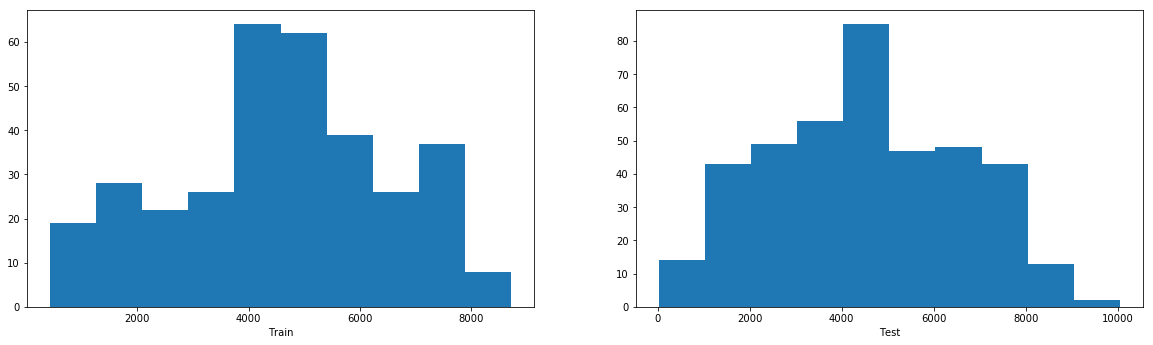

In [16]:
fig = plt.figure(figsize=(20, 12))
plt.subplot(221)
plt.hist(y_train)
plt.xlabel("Train")

plt.subplot(222)
plt.hist(y_test)
plt.xlabel("Test")
fig.tight_layout

print("Y Test Mean: {} \n Standard Deviation: {}".format(np.mean(y_test), np.std(y_test)))
print("Y Train Mean: {} \n Standard Deviation: {}".format(np.mean(y_train), np.std(y_train)))

In [17]:
outlier_model = LinearRegression(fit_intercept = True)
mean = np.mean(y_train)
std = np.std(y_train)
#getting the predicted y's for the training set
y_hat = results_new.predict(X_2)
outlier_model.fit(new_x_train, y_train, sample_weight=(y_train/abs(y_train - y_hat)))
print("Training R^2:", outlier_model.score(new_x_train, y_train))
print("Test R^2:", outlier_model.score(new_x_test, y_test))

Training R^2: 0.657472392798
Test R^2: 0.27524261401


This information about the erroneous labels can be used to improve upon our model in several ways including bootstrapping and outlier detection. 

Because we know that the information in y_test is accurate, we could compare the distribution of y_test to the distribution of y_train to see which 5% is most likely erroneous. This approach, however, would leak data out of the test set and into the training set, which would mean that our model would be fitting to the validation set and therefore our validation would not provide a reliable picture of our model working on something out of sample. Without taking into account the distribution of y_test, we might try to eliminate that 5% error by dropping outlier predictions or weighting them less the farther they are from the mean. However, this approach does not make much sense, because the erroneous data could be anywhere in the distribution, not just far from the mean. 

We decided that our best option was to try and penalize outlier values of y_train, because we didn't want to leak from our validation set. In order to implement this we used the same method that we did for the RMSLE and changed the sample_weight of a linear regression model. We weighted each value so that values would have less weight if the error for the model in part g was large. There is a risk in doing this that we overfit to the training data, but our R^2 on the testing data was almost as good as our R^2 for part g, so we know that we haven't overfit to the training data too much.

---
--_

# APCOMP209a - Homework Question



##  Question 1: Student's t MLE

Use Maximum Likelihood Estimation to generate a linear regression model on the data provided in ``beerdata.csv`` considering two statistical models for noise: a) iid Normal and b) iid Student's t-distribution with $\nu=5$ and scale factor σ=0.5.  

Compare the two models performances and comment why it is perhaps appropriate to use the Student's t-distribution instead of the Normal? 





HINTS:
1. Use the probability density function for the Student's t distribution  with location μ and scale factor σ.
2. If the MLE regressions coefficients can not be derived analytically consider numerical methods.
3. You can use sklearn or statsmodel for the Normal case 




## Question 2 (continued from HW2) 

Read sections 1 and 2 of this [paper](https://www.researchgate.net/profile/Roberto_Togneri/publication/45094554_Linear_Regression_for_Face_Recognition/links/09e4150d243bd8b987000000/Linear-Regression-for-Face-Recognition.pdf). 

Briefly, the model leverages the concept that "patterns from a single-object class lie on a linear subspace."   It also makes use of the idea of linear regression as a problem about projections.  In this case, given a vector $y$, the goal is to find the subspace induced by $\mathrm{Col} \, \mathbf X$ that produced the 'closest' projection vector $\widehat y$ to the original $y$.  

### Question 2a

As discussed in the paper, our face dataset contains cleaned images of faces belonging to different people. Assuming that patterns (faces) from one class (person) are elements of the same subspace, let's try to classify an unknown face using the method presented in the paper.  For each class $i$, we need to:

1. construct the $\mathbf H_i$ hat matrix from known faces, being careful to follow the column concatenation step described in the paper to convert an image into its vector representation;
2. calculate the predicted $\widehat y_i$, the closest vector in $\mathrm{Col} \, \mathbf X_i$ to $y$; and
3. calculate the magnitude of the difference vector between $y$ and $\widehat y_i$.

You should then be able to make a classification decision.

**Notes:**
- Use the provided code to download and re-sample the dataset.
- Follow the normalisation step in the paper to ensure the "maximum pixel value is 1".
- Your classifier should have approximately an 80% accuracy.
- Use the image plotting library of matplotlib to display one (or two) correctly classified faces and the known faces.
- Use the image plotting library of matplotlib to display one (or two) incorrectly classified faces and the known faces.
    
### Question 2b - Significant Faces
Select an example of a correctly classified face. Use statsmodels to investigate the most predictive columns (faces) that the model used in this regression:

(i) Which columns (i.e. faces) make the highest contribution to the projection?

(ii) Which columns (i.e. faces) are the least useful in making this projection?

Plot the correctly assigned face, and the two faces from the questions (i) and (ii). What do you notice about these faces?

In [ ]:
from io import BytesIO
from zipfile import ZipFile
import urllib
import os

# Note that you may need to run the following command to install Python Image Library (PIL)
#pip install Pillow
from PIL import Image
import numpy as np
from sklearn.cross_validation import train_test_split

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# starter functions provided to students
def rgb2gray(rgb):
    '''
    function to convert RGB image to gray scale
    accepts 3D numpy array and returns 2D array with same dimensions
    as the first two dimensions of input
    '''
    
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def fetch_and_read_data(shape=(50,30)):
    
    '''
    Function to download image data, store in a local folder (note this is 18.4mb), only download the data when
    the local folder is not present, read in the images, downsample them to the specified shape (default = (50x30) (rows x cols))
    and finally split them into a four tuple return object.
    
    Returns:
        - 1) training image data (i.e. images that should form the predictor matrix in your solution)
        - 2) training image data labels (i.e. labels from 1 to 50 that identify which face (1) belongs to)
        - 3) testing image data (i.e. data that you should use to try and classify - note this forms the predictor variable in your regression)
        - 4) testing image data labels (i.e. the labels for (3) - this is to allow you to evaluate your model)
    
    ___________________
    Aside:
    If you want to change the sampling dimensions of your data, pass the shape = (x,y) argument to the method where
    y is the number of columns and x is the number of rows in the image.
    '''
    
    if not os.path.exists('./cropped_faces'):
        url = urllib.request.urlopen("http://www.anefian.com/research/GTdb_crop.zip")
        
        zipfile = ZipFile(BytesIO(url.read()))
        zipfile.extractall()
     
    data = []
    labels = []
    
    files = os.listdir('cropped_faces')
    for f in files:
        if '.jpg' in f:
            image = Image.open('cropped_faces/' + f)
            image = image.resize((shape[1], shape[0]))
            data.append(rgb2gray(np.asarray(image)))
            labels.append(int(f.split('_')[0][1:]) - 1)
            
    data = np.array(data)
    
    trainX, testX, trainY, testY = train_test_split(data, labels, test_size=0.2, stratify=labels)
    return np.array(trainX), np.array(testX), np.array(trainY), np.array(testY)

In [ ]:
# starter code for the students
train_dataset, test_dataset, train_labels, test_labels = fetch_and_read_data()

# code to plot some of the images
fig, axes = plt.subplots(2,4,figsize=(10,5))
axes = axes.flatten()
[axes[i].imshow(train_dataset[i], cmap='gray') for i in range(len(axes))]
plt.show()

In [2]:
l = ['a', 'b', 'c', 'a']
print(list(set(l)))

['b', 'a', 'c']


In [3]:
list1 = [1, 2, 3, 4]
list2 = [5, 6, 7, 8]
zipped = list(zip(list1, list2))
zipped[0][0]

1